# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv', nrows=70000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (70000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in resouce data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resouce data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [6]:
project_data.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1

In [7]:
# referencing: replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

# sorting dataframe based on time in pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(4)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
51140           CA 2016-04-27 00:46:53          Grades PreK-2   
473             GA 2016-04-27 00:53:00          Grades PreK-2   
41558           WA 2016-04-27 01:05:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
51140        Literacy & Language                                 Literacy   
473             Applied Learning                        Early Development   
41558        Literacy & Language                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
51140                                            10                    1  
473                                               2                    1  
41558                                             2                    1

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

#### Text preprocessing on essays 

In [10]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:42<00:00, 684.86it/s]


In [14]:
# after preprocesing
preprocessed_essays[20000]
# replacing essay data with cleaned and preprocessed data
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [15]:
# similarly you can preprocess the titles also
def preprocess_text_func(text_data):
    sent = decontracted(text_data)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    return sent.lower()

In [16]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    preprocessed_titles.append(preprocess_text_func(sentance))
project_data['project_title']=preprocessed_titles

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:05<00:00, 12868.72it/s]


#### Number of words in titles 

In [24]:
title_word_cnt = []
for _title in project_data["project_title"]:
    title_word_cnt.append(len(_title.split()))
project_data["title_word_count"] = title_word_cnt

#### Number of words in essay 

In [25]:
essay_word_cnt = []
for _essay in project_data["essay"]:
    essay_word_cnt.append(len(_essay.split()))
project_data["essay_word_cnt"] = essay_word_cnt

### Calculating sentiment scores for essay 

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
negative = []
positive = []
neutral = []
compound = []

def update_sentiments(_analyzer):
    negative.append(_analyzer["neg"])
    positive.append(_analyzer["pos"])
    neutral.append(_analyzer["neu"])
    compound.append(_analyzer["compound"])

In [21]:
for _essay in tqdm(project_data["essay"]):
    update_sentiments(analyzer.polarity_scores(_essay))

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [05:12<00:00, 223.69it/s]


In [22]:
project_data["neg"] = negative
project_data["pos"] = positive
project_data["neu"] = neutral
project_data["compound"] = compound

In [26]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
51140           CA 2016-04-27 00:46:53          Grades PreK-2   

                                 project_title  \
55660      engineering steam primary classroom   
51140  mobile learning mobile listening center   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
51140  My students need a mobile listening center to ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
51140                                            10                    1   

        clean_categories                 clean_subcategories  \
55660       Math_Science  AppliedSciences Health_LifeScience   
51140  Literacy_Language                            Literacy   

                                                   essay  title_word_count  \
55660  i fortunate enough use fairy tale stem kits cl...                 4   
51140  having class 24 students comes diverse learner...                 5   

       essay_word_cnt    neg    pos    neu  compound  
55660             175  0.013  0.205  0.783    0.9867  
51140             116  0.017  0.262  0.721    0.9860

## 1.5 Preparing data for models

In [27]:
# dropping unwanted columns such as Unnamed
project_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [28]:
project_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date',
       'project_grade_category', 'project_title', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_cnt', 'neg', 'pos', 'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (70000, 9)


In [30]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'History_Geography', 'Music', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (70000, 30)


In [31]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
def perform_one_hot_encoding(listdata, category,fillnan_value=""):
    vectorizer =  CountVectorizer(vocabulary=listdata, lowercase=False, binary=True)
    vectorizer.fit(project_data[category].fillna(fillnan_value).values)
    print(vectorizer.get_feature_names())
    print("="*50)
    return vectorizer.transform(project_data[category].fillna(fillnan_value).values)

In [32]:
# One hot encoding for school state
countries_list = sorted(project_data["school_state"].value_counts().keys())
school_state_one_hot = perform_one_hot_encoding(countries_list, "school_state")
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (70000, 51)


In [33]:
# Project_Grade_Category - replacing hyphens, spaces with Underscores
project_data['project_grade_category'] = project_data['project_grade_category'].map({'Grades PreK-2': 'Grades_PreK_2',
                                                                                     'Grades 6-8' : 'Grades_6_8',
                                                                                     'Grades 3-5' : 'Grades_3_5',
                                                                                     'Grades 9-12' : 'Grades_9_12'})
project_data['teacher_prefix'] = project_data['teacher_prefix'].map({'Mrs.': 'Mrs', 'Ms.': 'Ms', 'Mr.' : 'Mr', 
                                                                     'Teacher': 'Teacher', 'Dr.' : 'Dr'})

In [34]:
# Replacing Null values with most repititive values
project_data["teacher_prefix"].fillna("Mrs", inplace=True)
# One hot encoding for teacher_prefix
teacher_prefix_list = sorted(project_data["teacher_prefix"].value_counts().keys())
print (teacher_prefix_list)
teacher_prefix_one_hot = perform_one_hot_encoding(teacher_prefix_list, "teacher_prefix", "Mrs.")
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (70000, 5)


In [35]:
# One hot encoding for project_grade_category
grade_list = sorted(project_data["project_grade_category"].value_counts().keys())
grade_one_hot = perform_one_hot_encoding(grade_list, "project_grade_category")
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2']
Shape of matrix after one hot encodig  (70000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (70000, 13980)


In [37]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer_titles = CountVectorizer(min_df=10)
text_bow_titles = vectorizer_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_bow_titles.shape)
bow_titles_feature_names = vectorizer.get_feature_names()

Shape of matrix after one hot encodig  (70000, 2535)


#### 1.5.2.2 TFIDF vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (70000, 13980)


In [39]:
# TFIDF  Vectorizer for Preprocessed Title
vectorizer_titles = TfidfVectorizer(min_df=10)
text_tfidf_titles = vectorizer_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",text_tfidf_titles.shape)

Shape of matrix after one hot encodig  (70000, 2535)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [40]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [41]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [42]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 70000/70000 [01:00<00:00, 1166.28it/s]


70000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [43]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [44]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [06:31<00:00, 178.91it/s]


70000
300


In [45]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [46]:
tfidf_w2v_vectors_titles = []; # the avg-w2v for each project_title is stored in this list
for sentence in tqdm(preprocessed_titles): # for each project_title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles.append(vector)

print(len(tfidf_w2v_vectors_titles))
print(len(tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:05<00:00, 12426.18it/s]


70000
300


### 1.5.3 Vectorizing Numerical features

In [47]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [48]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 299.56909628571424, Standard deviation : 378.735509343104


In [49]:
price_standardized

array([[ 1.12342491],
       [ 0.07770833],
       [ 0.47914943],
       ...,
       [ 0.08264581],
       [-0.08184893],
       [ 0.26253388]])

In [50]:
# Vectorizing teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.24927142857143, Standard deviation : 28.03423964237886


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [51]:
# Categorical
print(school_state_one_hot.shape)
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(teacher_prefix_one_hot.shape)
print(grade_one_hot.shape)
print(text_bow_titles.shape)
print(text_bow.shape)
# Numerical
print(price_standardized.shape)
print(teacher_number_of_previously_posted_projects_standardized.shape)

(70000, 51)
(70000, 9)
(70000, 30)
(70000, 5)
(70000, 4)
(70000, 2535)
(70000, 13980)
(70000, 1)
(70000, 1)


In [52]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((school_state_one_hot,categories_one_hot, sub_categories_one_hot, teacher_prefix_one_hot,
            grade_one_hot, text_bow_titles, text_bow, price_standardized, 
            teacher_number_of_previously_posted_projects_standardized))
X.shape

(70000, 16616)

__ Computing Sentiment Scores__

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] , and the best `min_samples_split` in range [2,10,20,30,40,50])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# Seperating Labels from Project_Data dataframe
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

id                        teacher_id teacher_prefix school_state  \
0  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            Mrs           CA   

                 Date project_grade_category  \
0 2016-04-27 00:27:36          Grades_PreK_2   

                         project_title  \
0  engineering steam primary classroom   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     Math_Science   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   

                                               essay  title_word_count  \
0  i fortunate enough use fairy tale stem kits cl...                 4   

   essay_word_cnt    neg    pos    neu  compound   price  quantity  
0             175  0.013  0.205  0.783    0.9867  725.05         4

In [55]:
# Train Test Stratified Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(31423, 20) (31423,)
(15477, 20) (15477,)
(23100, 20) (23100,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [56]:
# Encoding School State - OHE
# School State
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_state.get_feature_names())
print("="*100)

After vectorizations
(31423, 51) (31423,)
(15477, 51) (15477,)
(23100, 51) (23100,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [57]:
# Encoding Teacher Prefix OHE
# teacher_prefix
vectorizer_prefix = CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_prefix.get_feature_names())
print("="*100)

After vectorizations
(31423, 5) (31423,)
(15477, 5) (15477,)
(23100, 5) (23100,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [59]:
# Encoding project_grade_category
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade.get_feature_names())
print("="*100)

After vectorizations
(31423, 4) (31423,)
(15477, 4) (15477,)
(23100, 4) (23100,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [60]:
# Encoding Categories
# clean_categories
vectorizer_category = CountVectorizer()
vectorizer_category.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_category_ohe = vectorizer_category.transform(X_train['clean_categories'].values)
X_cv_category_ohe = vectorizer_category.transform(X_cv['clean_categories'].values)
X_test_category_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
print(X_cv_category_ohe.shape, y_cv.shape)
print(X_test_category_ohe.shape, y_test.shape)
print(vectorizer_category.get_feature_names())
print("="*100)

After vectorizations
(31423, 9) (31423,)
(15477, 9) (15477,)
(23100, 9) (23100,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [61]:
# Encoding sub categories
vectorizer_subcategory = CountVectorizer()
vectorizer_subcategory.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcategory_ohe = vectorizer_subcategory.transform(X_train['clean_subcategories'].values)
X_cv_subcategory_ohe = vectorizer_subcategory.transform(X_cv['clean_subcategories'].values)
X_test_subcategory_ohe = vectorizer_subcategory.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_cv_subcategory_ohe.shape, y_cv.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print(vectorizer_subcategory.get_feature_names())
print("="*100)

After vectorizations
(31423, 30) (31423,)
(15477, 30) (15477,)
(23100, 30) (23100,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


Encoding Numerical features

In [62]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [63]:
# Quantity
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [64]:
# teacher previously posted projects
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teach_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_teach_prev_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teach_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teach_prev_norm = X_train_teach_prev_norm.reshape(-1,1)
X_cv_teach_prev_norm = X_cv_teach_prev_norm.reshape(-1,1)
X_test_teach_prev_norm = X_test_teach_prev_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_teach_prev_norm.shape, y_train.shape)
print(X_cv_teach_prev_norm.shape, y_cv.shape)
print(X_test_teach_prev_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [65]:
# No. of words in Project Title
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

X_train_title_count_norm = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
X_cv_title_count_norm = normalizer.transform(X_cv['title_word_count'].values.reshape(-1,1))
X_test_title_count_norm = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_title_count_norm.shape, y_train.shape)
print(X_cv_title_count_norm.shape, y_cv.shape)
print(X_test_title_count_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [67]:
# No. of words in Project essay normalization
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_cnt'].values.reshape(-1,1))

X_train_essay_count_norm = normalizer.transform(X_train['essay_word_cnt'].values.reshape(-1,1))
X_cv_essay_count_norm = normalizer.transform(X_cv['essay_word_cnt'].values.reshape(-1,1))
X_test_essay_count_norm = normalizer.transform(X_test['essay_word_cnt'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_count_norm.shape, y_train.shape)
print(X_cv_essay_count_norm.shape, y_cv.shape)
print(X_test_essay_count_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [70]:
# Essay sentiment pos
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_essay_pos_norm = normalizer.transform(X_train['pos'].values.reshape(-1,1))
X_cv_essay_pos_norm = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
X_test_essay_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_pos_norm.shape, y_train.shape)
print(X_cv_essay_pos_norm.shape, y_cv.shape)
print(X_test_essay_pos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [71]:
# Essay sentiment neg
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_essay_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))
X_cv_essay_neg_norm = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
X_test_essay_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_neg_norm.shape, y_train.shape)
print(X_cv_essay_neg_norm.shape, y_cv.shape)
print(X_test_essay_neg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [72]:
# Essay sentiment neu
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_essay_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))
X_cv_essay_neu_norm = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
X_test_essay_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_neu_norm.shape, y_train.shape)
print(X_cv_essay_neu_norm.shape, y_cv.shape)
print(X_test_essay_neu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


In [73]:
# Essay sentiment compound
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_essay_compound_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_cv_essay_compound_norm = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
X_test_essay_compound_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_compound_norm.shape, y_train.shape)
print(X_cv_essay_compound_norm.shape, y_cv.shape)
print(X_test_essay_compound_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1) (31423,)
(15477, 1) (15477,)
(23100, 1) (23100,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [74]:
# BOW with essays min_df=10
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(X_train['essay'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [75]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow_essay.transform(X_test['essay'].values)

In [76]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 10193) (31423,)
(15477, 10193) (15477,)
(23100, 10193) (23100,)


In [133]:
# Preprocessing project_title
vectorizer_title_bow = CountVectorizer(min_df=10)
vectorizer_title_bow.fit(X_train['project_title'].values) # fit has to happen only on train data

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [134]:
# we use the fitted CountVectorizer to convert the text to vector
X_train_pj_title_bow = vectorizer_title_bow.transform(X_train['project_title'].values)
X_cv_pj_title_bow = vectorizer_title_bow.transform(X_cv['project_title'].values)
X_test_pj_title_bow = vectorizer_title_bow.transform(X_test['project_title'].values)
print("After vectorizations")
print(X_train_pj_title_bow.shape, y_train.shape)
print(X_cv_pj_title_bow.shape, y_cv.shape)
print(X_test_pj_title_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1554) (31423,)
(15477, 1554) (15477,)
(23100, 1554) (23100,)


In [82]:
# TFIDF Vectorizer min_Df=10
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train["essay"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [83]:
# we use the fitted TFidfVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tfidf_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf_essay.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 10193) (31423,)
(15477, 10193) (15477,)
(23100, 10193) (23100,)


In [84]:
# TFIDF Vectorizer min_Df=10
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train["project_title"])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [85]:
# we use the fitted TFidfVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer_tfidf_title.transform(X_train['project_title'].values)
X_cv_title_tfidf = vectorizer_tfidf_title.transform(X_cv['project_title'].values)
X_test_title_tfidf = vectorizer_tfidf_title.transform(X_test['project_title'].values)
print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(31423, 1554) (31423,)
(15477, 1554) (15477,)
(23100, 1554) (23100,)


In [87]:
# Using pretrained model - avgw2v
with open (r'glove_vectors', "rb") as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [88]:
# Train Essay
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))

100%|██████████████████████████████████████████████████████████████████████████| 31423/31423 [00:25<00:00, 1226.87it/s]


31423


In [89]:
# Cross Validation avgw2v essay
avg_w2v_vectors_cv = []; 

for sentence in tqdm(X_cv["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))

100%|██████████████████████████████████████████████████████████████████████████| 15477/15477 [00:11<00:00, 1369.13it/s]


15477


In [90]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))

100%|██████████████████████████████████████████████████████████████████████████| 23100/23100 [00:18<00:00, 1219.89it/s]


23100


In [91]:
# avgw2v vectorizing on Project Titles (Train)
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))

100%|█████████████████████████████████████████████████████████████████████████| 31423/31423 [00:01<00:00, 25584.96it/s]


31423


In [92]:
# avgw2v vectorizing on Project Titles (cross validation)
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_cv.append(vector)

print(len(avg_w2v_vectors_titles_cv))

100%|█████████████████████████████████████████████████████████████████████████| 15477/15477 [00:00<00:00, 25543.76it/s]


15477


In [93]:
# avgw2v vectorizing on Project Titles (test)
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))

100%|█████████████████████████████████████████████████████████████████████████| 23100/23100 [00:00<00:00, 26146.15it/s]


23100


In [94]:
# Using Pretrained Model - TFIDF weighted W2V
# Train Essays

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [95]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))

100%|███████████████████████████████████████████████████████████████████████████| 31423/31423 [02:56<00:00, 178.20it/s]


31423


In [96]:
# tfidf avgw2v on cv essay
# compute average word2vec for each review.

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))

100%|███████████████████████████████████████████████████████████████████████████| 15477/15477 [01:13<00:00, 210.54it/s]


15477


In [97]:
# tfidf avgw2v on test essay
# compute average word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))

100%|███████████████████████████████████████████████████████████████████████████| 23100/23100 [00:38<00:00, 596.63it/s]


23100


In [98]:
# TFIDF avgw2v on project titles
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["project_title"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_title_words = set(tfidf_model.get_feature_names())

In [103]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))

100%|█████████████████████████████████████████████████████████████████████████| 31423/31423 [00:00<00:00, 40034.37it/s]


31423


In [105]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_cv = []; 

for sentence in tqdm(X_cv["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_cv.append(vector)

print(len(tfidf_w2v_vectors_titles_cv))

100%|█████████████████████████████████████████████████████████████████████████| 15477/15477 [00:00<00:00, 37942.34it/s]


15477


In [104]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))

100%|█████████████████████████████████████████████████████████████████████████| 23100/23100 [00:00<00:00, 38347.31it/s]


23100


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [135]:
from scipy.sparse import hstack
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,
               X_train_subcategory_ohe,X_train_price_norm,X_train_quantity_norm,
               X_train_teach_prev_norm,X_train_title_count_norm,X_train_essay_count_norm,
               X_train_essay_pos_norm,X_train_essay_neg_norm,X_train_essay_neu_norm,
               X_train_essay_compound_norm,X_train_essay_bow,X_train_pj_title_bow)).tocsr()

X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe,X_cv_price_norm,X_cv_quantity_norm,X_cv_teach_prev_norm,
               X_cv_title_count_norm,X_cv_essay_count_norm,X_cv_essay_pos_norm,X_cv_essay_neg_norm,
               X_cv_essay_neu_norm,X_cv_essay_compound_norm,X_cv_essay_bow,X_cv_pj_title_bow)).tocsr()

X_te = hstack((X_test_state_ohe, X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,
               X_test_subcategory_ohe,X_test_price_norm,X_test_quantity_norm,
               X_test_teach_prev_norm,X_test_title_count_norm,X_test_essay_count_norm,
               X_test_essay_pos_norm,X_test_essay_neg_norm,X_test_essay_neu_norm,
               X_test_essay_compound_norm,X_test_essay_bow,X_test_pj_title_bow)).tocsr()

In [136]:
print("Final Data matrix - for set 1")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 1
(31423, 11855) (31423,)
(15477, 11855) (15477,)
(23100, 11855) (23100,)


In [137]:
print(X_train_state_ohe.shape)
print(X_train_teacher_ohe.shape)
print(X_train_grade_ohe.shape)
print(X_train_category_ohe.shape)
print(X_train_subcategory_ohe.shape)
print(X_train_price_norm.shape)
print(X_train_quantity_norm.shape)
print(X_train_teach_prev_norm.shape)
print(X_train_title_count_norm.shape)
print(X_train_essay_count_norm.shape)
print(X_train_essay_pos_norm.shape)
print(X_train_essay_neg_norm.shape)
print(X_train_essay_neu_norm.shape)
print(X_train_essay_compound_norm.shape)
print(X_train_essay_bow.shape)
print(X_train_pj_title_bow.shape)

(31423, 51)
(31423, 5)
(31423, 4)
(31423, 9)
(31423, 30)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 1)
(31423, 10193)
(31423, 1554)


### Elements for Graphviz Visualization of DT with BOW  

In [138]:
feature_names_bow =[]
feature_names_bow.extend(vectorizer_state.get_feature_names())
feature_names_bow.extend(vectorizer_prefix.get_feature_names())
feature_names_bow.extend(vectorizer_grade.get_feature_names())
feature_names_bow.extend(vectorizer_category.get_feature_names())
feature_names_bow.extend(vectorizer_subcategory.get_feature_names())
print(len(feature_names_bow))

99


In [139]:
feature_names_bow.extend(["price","quantity","teacher_previously_posted_projects",
                          "title_word_count","essay_word_count","pos","neg","neu","compund"])

In [140]:
feature_names_bow.extend(vectorizer_bow_essay.get_feature_names())
feature_names_bow.extend(vectorizer_title_bow.get_feature_names())

In [141]:
len(vectorizer_bow_essay.get_feature_names())

10193

In [142]:
len(vectorizer_title_bow.get_feature_names())

1554

In [143]:
print(len(feature_names_bow))

11855


In [144]:
# Necessary Package imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [145]:
# Lets use GridSearchCV to find the best possible hyperparameter
# a) max_depth
# b) min_samples_split

tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
                  'min_samples_split': [5, 10, 100, 500]}

dt_output = DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(dt_output, tree_parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500

In [146]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6412694831221677
Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}
Train AUC scores
[0.54684302 0.54684302 0.54684302 0.54684302 0.64293694 0.64285386
 0.64180878 0.63888682 0.74098254 0.73798496 0.71842862 0.6963649
 0.97382791 0.96478501 0.89854559 0.81326944 0.99310941 0.9876436
 0.93627543 0.83472589 0.99991787 0.99837581 0.95847255 0.84632457
 0.99311312 0.98792048 0.93714896 0.83533081]
CV AUC scores
[0.54431922 0.54431922 0.54431922 0.54431922 0.61786541 0.6177401
 0.61712657 0.62083002 0.62796751 0.62774736 0.63018924 0.64126948
 0.57438424 0.57520901 0.6035592  0.61706908 0.56008339 0.56424608
 0.5873194  0.60808931 0.55440408 0.55731054 0.57347838 0.60237932
 0.55522074 0.56446685 0.58316371 0.6073413 ]


In [147]:
from itertools import repeat
x1 = []
y1 = []
max_depth = [1, 5, 10, 50, 100, 500, 100]
min_samples_split = [5, 10, 100, 500]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
y1 = [y for item in min_samples_split for y in repeat(item, 7)]

In [148]:
# PLotting the Data on a 3D scatter plot
# Train AUC v/s CV AUC v/c Max_Depth v/s Min_samples_split for Entropy and for Gini
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

In [149]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_scores, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=cv_auc_scores, name="cv auc")
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [150]:
# Training the model on best hyperparamets and testing in Test set
from sklearn.metrics import roc_curve, auc


dt_output = DecisionTreeClassifier(class_weight='balanced', max_depth = clf.best_params_["max_depth"], 
                                   min_samples_split = clf.best_params_["min_samples_split"])
dt_output.fit(X_tr, y_train)

y_train_pred = dt_output.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = dt_output.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

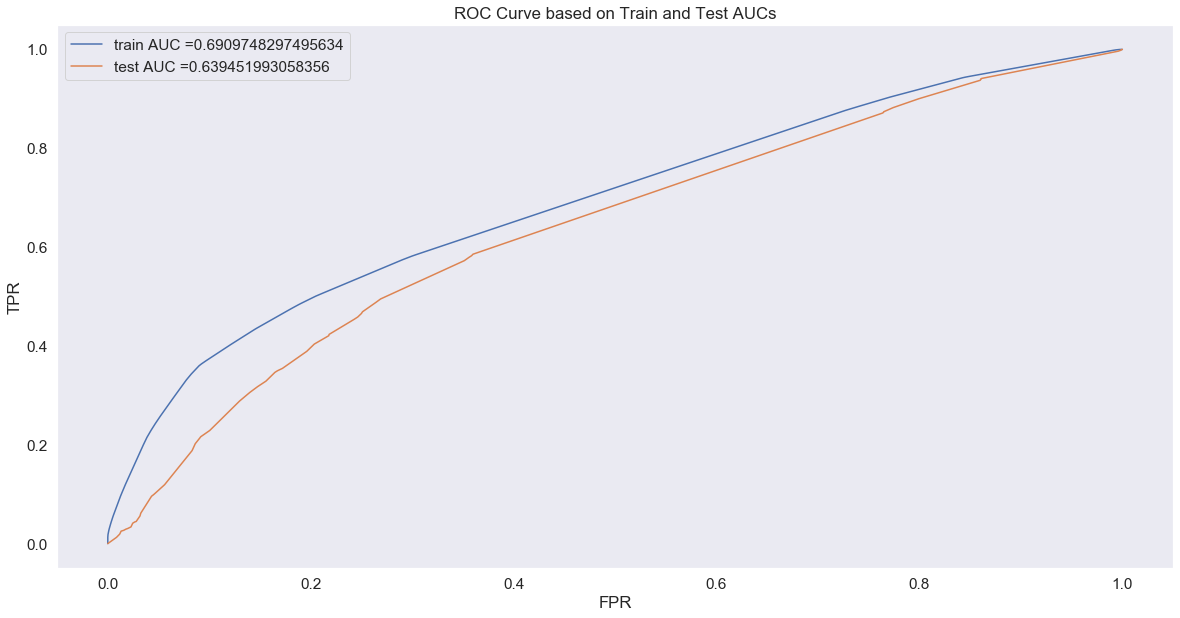

In [151]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [173]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global _predictions
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    _predictions = predictions
    return predictions

In [174]:
# Drawing the confusion matrix as a Seaborn Heatmap
import seaborn as sns
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.40753167541752006 for threshold 0.462
Train confusion matrix
[[ 3363  1376]
 [11360 15324]]
Test confusion matrix
[[ 2272  1231]
 [ 8377 11220]]


Text(0.5, 1, 'Training Confusion Matrix')

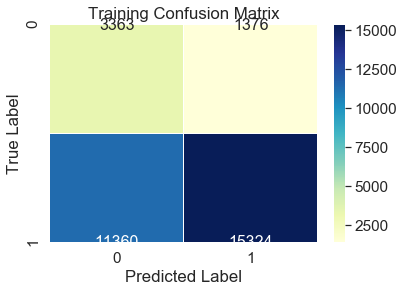

In [175]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

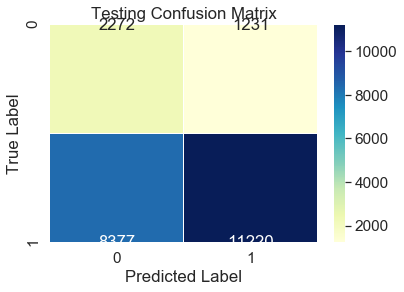

In [176]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [158]:
# Please write all the code with proper documentation
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr,y_train)
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
import pydot

In [161]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [162]:
_dot_data = tree.export_graphviz(dtree, feature_names=feature_names_bow)
graph = Source(_dot_data)
graph.render("Bag of Words Tree", view=True)

'Bag of Words Tree.pdf'

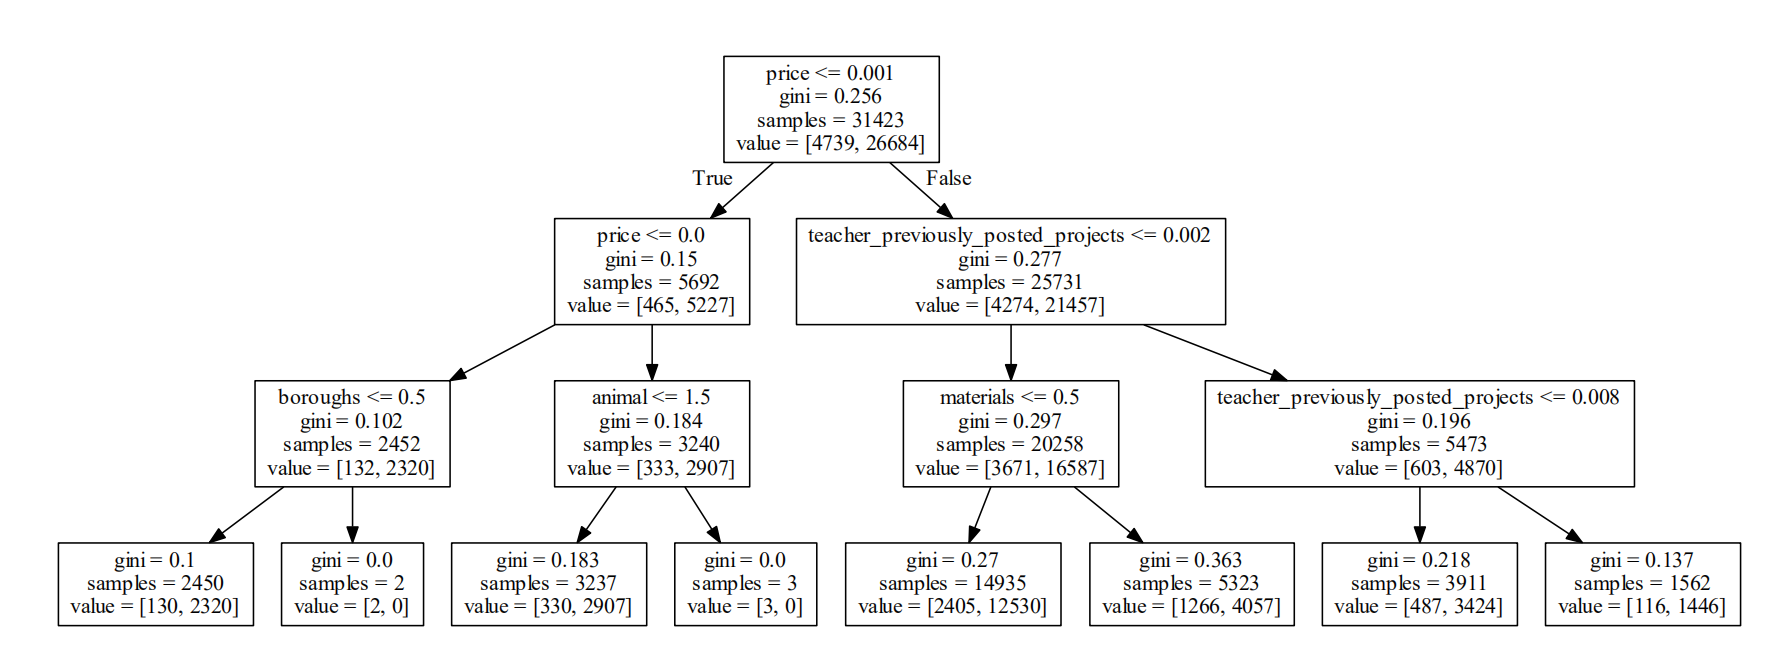

#### Obtaining the False Positives from the set - 1 BOW encoded essay 

In [177]:
X_test['essay'].values[2]

'as teacher low income high poverty school district students faced several challenges classroom despite many challenges face i looking keep things simple provide students creative meaningful learning experiences time kids closes gap the school pre k eighth grade building most students eager learn enjoy school most students single parent homes english second language my students utilize time for kids magazines many skills the magazines photographs captions sidebars even definitions complicated words each magazine focuses current events students always eager read in past i used articles teach language arts cross curriculum science social studies depending articles time for kids provides fantastic way learn techniques used informational text the parcc test focuses some articles written young journalists this encourages students try best writing the best part take magazines home share family nannan'

In [179]:
false_pos_indices = []
for i in range(len(y_test)):
    if(y_test[i]==0 and _predictions[i] == 1):
        false_pos_indices.append(i)

In [180]:
false_pos_essay = []
for i in false_pos_indices :
  false_pos_essay.append(X_test['essay'].values[i])

In [181]:
# reference - https://amueller.github.io/word_cloud/
from wordcloud import WordCloud, STOPWORDS
comments = " "
stopwords = set(STOPWORDS)
for _essay in false_pos_essay:
    tokens = str(_essay).lower().split()

for words in tokens:
    comments += words + " "
    
wordcloud = WordCloud(width=1000, height=1000, background_color="white",stopwords=stopwords, min_font_size=12).generate(comments)
    

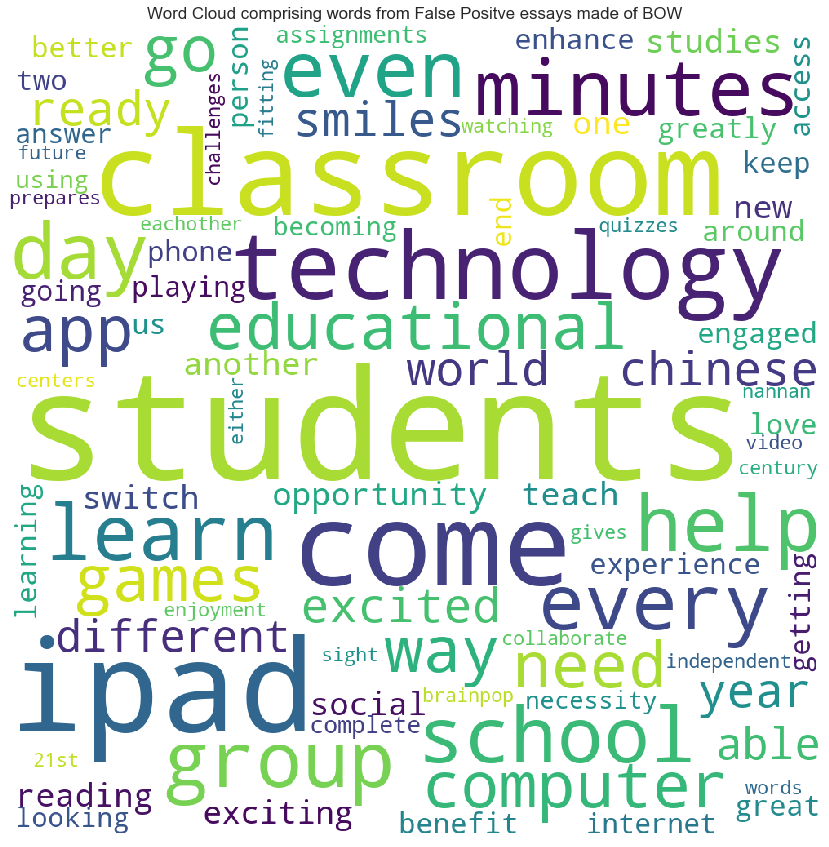

In [182]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud comprising words from False Positve essays made of BOW")
plt.show()

In [185]:
# Plot the box plot with the `price` of these `false positive data points`
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)
for i in false_pos_indices:
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i],axis=0))
    
X_test_falsePos.head(1)

id                        teacher_id teacher_prefix school_state  \
173  p189599  4b28bc08967e0b687de639a557fff4d5        Teacher           GA   

                   Date project_grade_category project_title  \
173 2016-04-28 07:22:55          Grades_PreK_2  kindles kids   

                              project_resource_summary  \
173  My students need Kindles for learning! Our kin...   

    teacher_number_of_previously_posted_projects  \
173                                            0   

                   clean_categories   clean_subcategories  \
173  Literacy_Language Math_Science  Literacy Mathematics   

                                                 essay title_word_count  \
173  what learn pleasure never forget alfred mercie...                2   

    essay_word_cnt    neg    pos    neu  compound  price quantity  
173            208  0.028  0.383  0.588    0.9982  53.06        3

In [186]:
len(X_test_falsePos)

397

Text(0.5, 1.0, "Box Plot 'Price' v/s 'FP Data'")

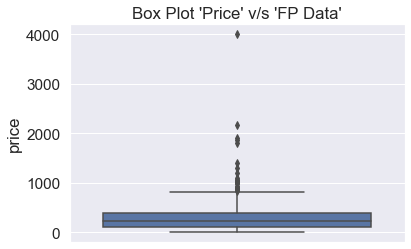

In [187]:
sns.boxplot(y="price",data=X_test_falsePos).set_title("Box Plot 'Price' v/s 'FP Data'")

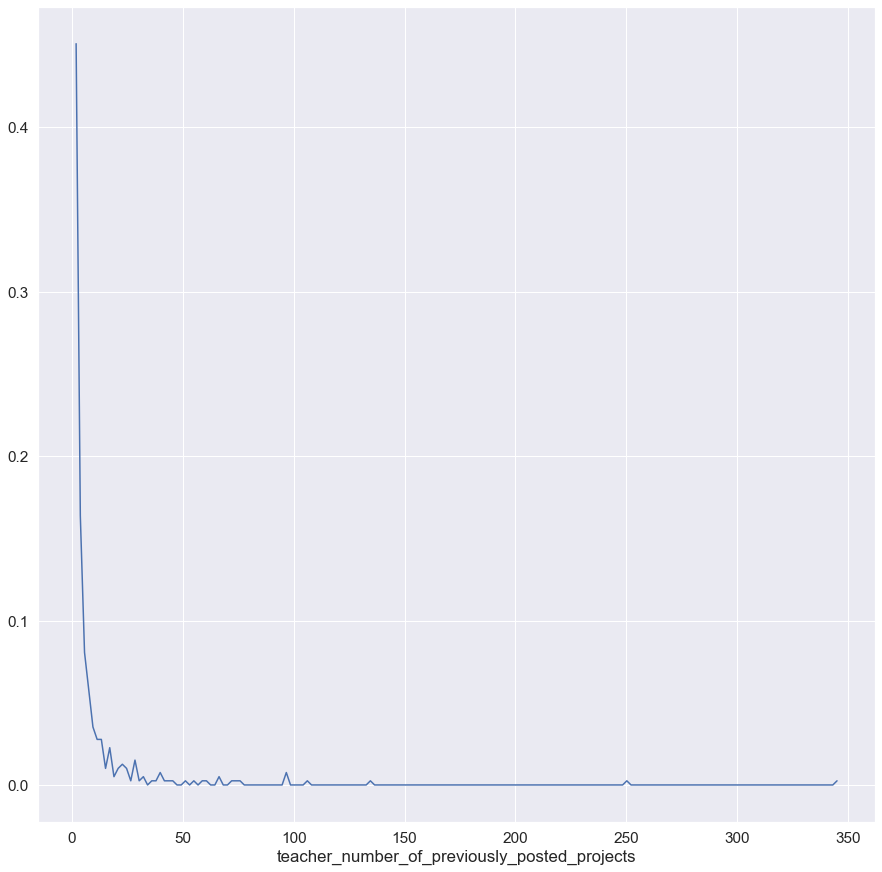

In [188]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(15,15))
counts, bin_edges = np.histogram(X_test_falsePos["teacher_number_of_previously_posted_projects"], bins="auto",density=True)
pdf = counts/sum(counts)
pdfPoints = plt.plot(bin_edges[1:],pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.show()

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [189]:
# Train, CV and Test Datasets for TFIDF
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,
               X_train_subcategory_ohe,X_train_price_norm,X_train_quantity_norm,
               X_train_teach_prev_norm,X_train_title_count_norm,X_train_essay_count_norm,
               X_train_essay_pos_norm,X_train_essay_neg_norm,X_train_essay_neu_norm,
               X_train_essay_compound_norm,X_train_essay_tfidf,X_train_title_tfidf)).tocsr()

X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe,X_cv_price_norm,X_cv_quantity_norm,X_cv_teach_prev_norm,
               X_cv_title_count_norm,X_cv_essay_count_norm,X_cv_essay_pos_norm,X_cv_essay_neg_norm,
               X_cv_essay_neu_norm,X_cv_essay_compound_norm,X_cv_essay_tfidf,X_cv_title_tfidf)).tocsr()

X_te = hstack((X_test_state_ohe, X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,
               X_test_subcategory_ohe,X_test_price_norm,X_test_quantity_norm,
               X_test_teach_prev_norm,X_test_title_count_norm,X_test_essay_count_norm,
               X_test_essay_pos_norm,X_test_essay_neg_norm,X_test_essay_neu_norm,
               X_test_essay_compound_norm,X_test_essay_tfidf,X_test_title_tfidf)).tocsr()

In [190]:
print("Final Data matrix - for set 2")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 2
(31423, 11855) (31423,)
(15477, 11855) (15477,)
(23100, 11855) (23100,)


### Elements for Graphviz Visualization of DT with TFIDF

In [193]:
feature_names_tfidf =[]
feature_names_tfidf.extend(vectorizer_state.get_feature_names())
feature_names_tfidf.extend(vectorizer_prefix.get_feature_names())
feature_names_tfidf.extend(vectorizer_grade.get_feature_names())
feature_names_tfidf.extend(vectorizer_category.get_feature_names())
feature_names_tfidf.extend(vectorizer_subcategory.get_feature_names())
feature_names_tfidf.extend(["price","quantity","teacher_previously_posted_projects",
                          "title_word_count","essay_word_count","pos","neg","neu","compund"])
feature_names_tfidf.extend(vectorizer_tfidf_essay.get_feature_names())
feature_names_tfidf.extend(vectorizer_tfidf_title.get_feature_names())
len(feature_names_tfidf)

11855

In [194]:
tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
                  'min_samples_split': [5, 10, 100, 500]}

dt_output = DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(dt_output, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500]

In [195]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6336259821735333
Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}
Train AUC scores
[0.54657747 0.54657747 0.54657747 0.54657747 0.65293038 0.65285638
 0.6513961  0.64811733 0.77012653 0.76779821 0.74094454 0.71398141
 0.98725429 0.9809964  0.92441306 0.8319907  0.99820547 0.99514739
 0.95583048 0.84607377 0.99996213 0.99889126 0.96511465 0.84958039
 0.99792945 0.9954866  0.95508649 0.84511864]
CV AUC scores
[0.54570906 0.54570906 0.54570906 0.54570906 0.62188232 0.62208349
 0.62222649 0.62264496 0.61598977 0.61629087 0.61914279 0.63362598
 0.55718343 0.56050043 0.58269834 0.61305567 0.54813047 0.54964932
 0.56469818 0.601161   0.54535653 0.5474374  0.56698552 0.60928208
 0.54679967 0.55010578 0.56745568 0.60267053]


In [196]:
from itertools import repeat
x1 = []
y1 = []
max_depth = [1, 5, 10, 50, 100, 500, 100]
min_samples_split = [5, 10, 100, 500]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
y1 = [y for item in min_samples_split for y in repeat(item, 7)]

In [197]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_scores, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=cv_auc_scores, name="cv auc")
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [198]:
dt_output = DecisionTreeClassifier(class_weight='balanced', max_depth = clf.best_params_["max_depth"], 
                                   min_samples_split = clf.best_params_["min_samples_split"])
dt_output.fit(X_tr, y_train)

y_train_pred = dt_output.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = dt_output.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

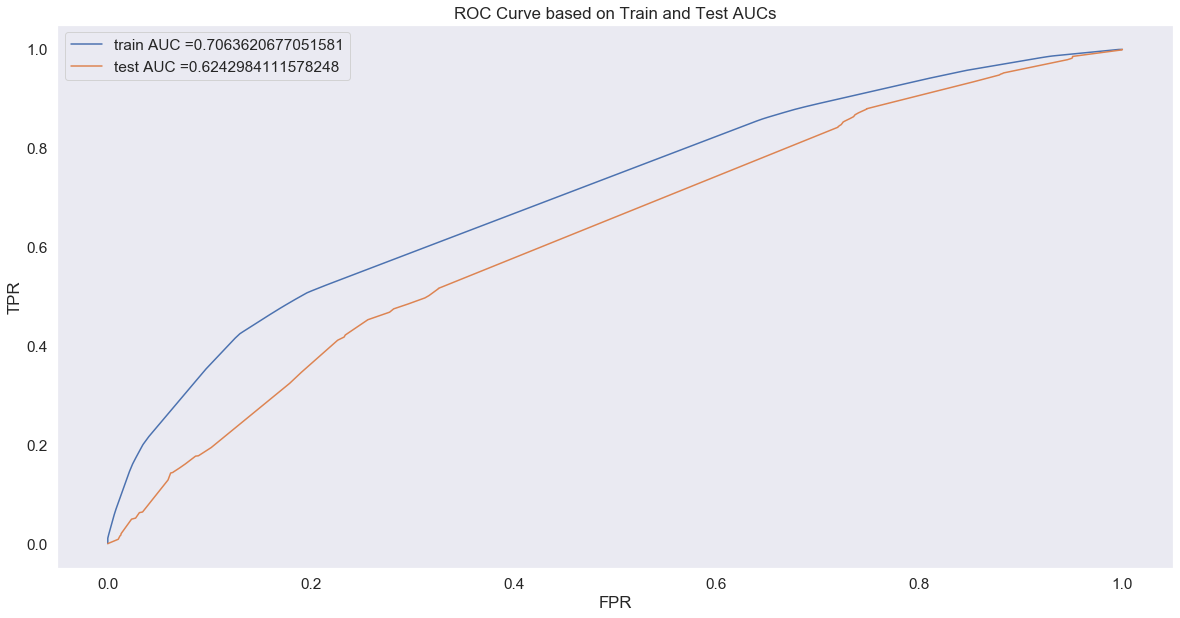

In [199]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [200]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.41081168363163656 for threshold 0.44
Train confusion matrix
[[ 3703  1036]
 [12655 14029]]
Test confusion matrix
[[ 2347  1156]
 [ 9410 10187]]


Text(0.5, 1, 'Training Confusion Matrix')

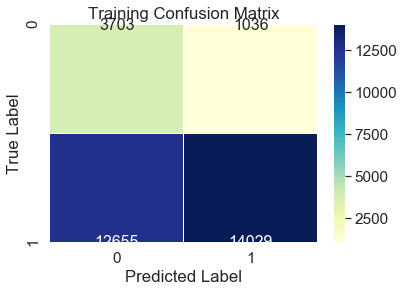

In [201]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

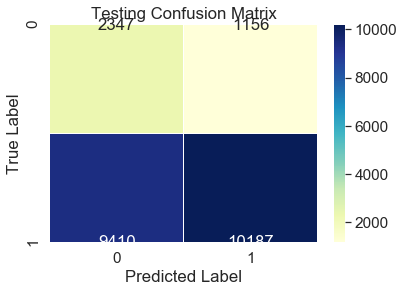

In [202]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [204]:
# Please write all the code with proper documentation
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr,y_train)
_dot_data = tree.export_graphviz(dtree, feature_names=feature_names_bow)
graph = Source(_dot_data)
graph.render("TFIDF Tree", view=True)

'TFIDF Tree.pdf'

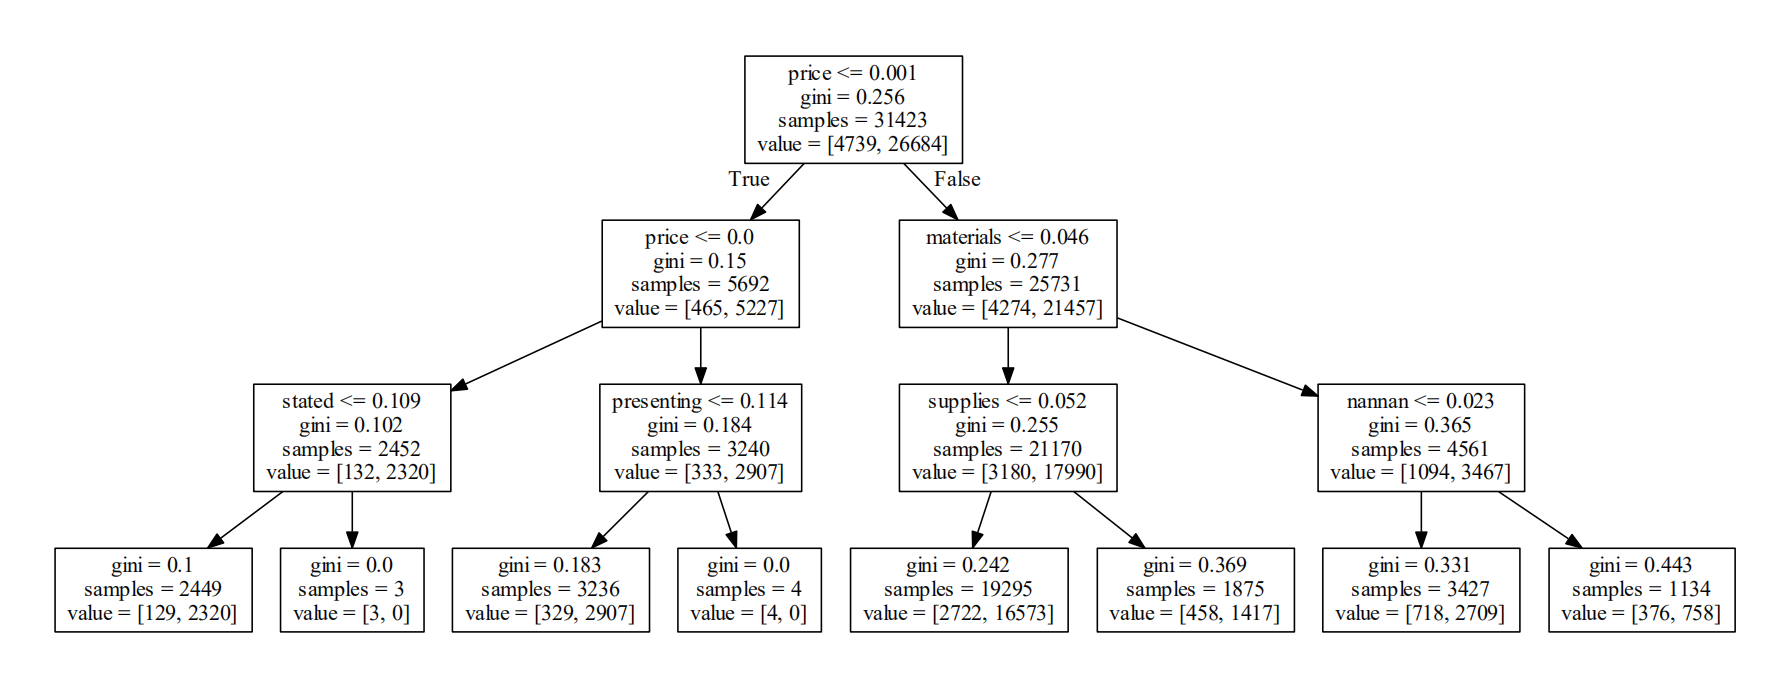

In [205]:
false_pos_indices = []
for i in range(len(y_test)):
    if(y_test[i]==0 and _predictions[i] == 1):
        false_pos_indices.append(i)
false_pos_essay = []
for i in false_pos_indices :
  false_pos_essay.append(X_test['essay'].values[i])

In [206]:
comments = " "
stopwords = set(STOPWORDS)
for _essay in false_pos_essay:
    tokens = str(_essay).lower().split()

for words in tokens:
    comments += words + " "
    
wordcloud = WordCloud(width=1000, height=1000, background_color="white",stopwords=stopwords, min_font_size=12).generate(comments)
    

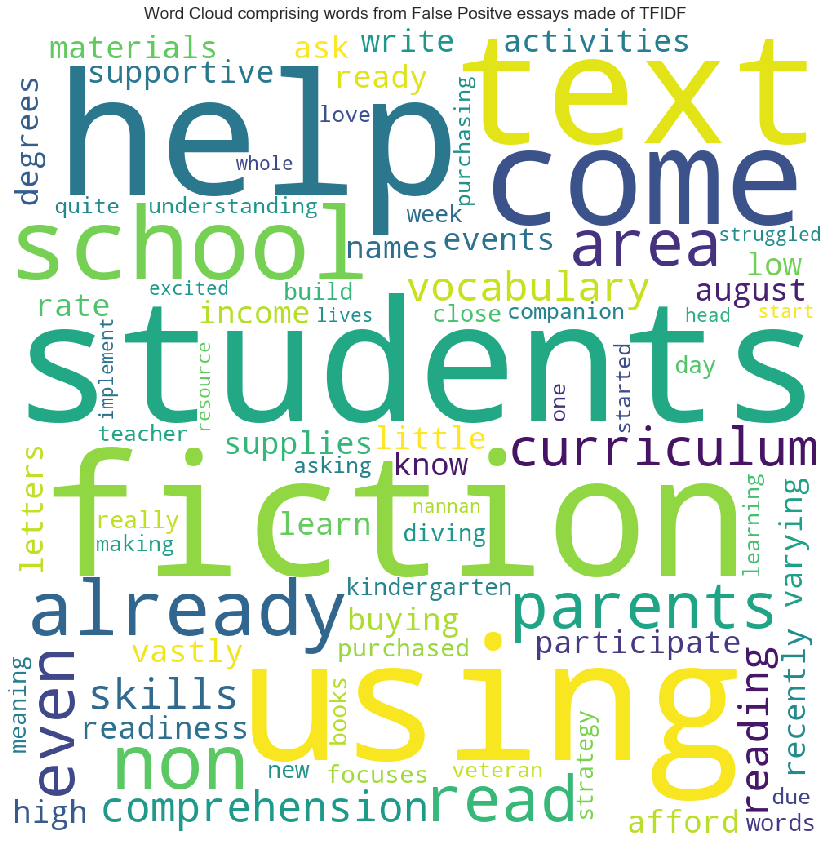

In [207]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud comprising words from False Positve essays made of TFIDF")
plt.show()

In [208]:
# Plot the box plot with the `price` of these `false positive data points`
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)
for i in false_pos_indices:
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i],axis=0))
    
X_test_falsePos.head(1)

id                        teacher_id teacher_prefix school_state  \
173  p189599  4b28bc08967e0b687de639a557fff4d5        Teacher           GA   

                   Date project_grade_category project_title  \
173 2016-04-28 07:22:55          Grades_PreK_2  kindles kids   

                              project_resource_summary  \
173  My students need Kindles for learning! Our kin...   

    teacher_number_of_previously_posted_projects  \
173                                            0   

                   clean_categories   clean_subcategories  \
173  Literacy_Language Math_Science  Literacy Mathematics   

                                                 essay title_word_count  \
173  what learn pleasure never forget alfred mercie...                2   

    essay_word_cnt    neg    pos    neu  compound  price quantity  
173            208  0.028  0.383  0.588    0.9982  53.06        3

Text(0.5, 1.0, "Box Plot 'Price' v/s 'FP Data'")

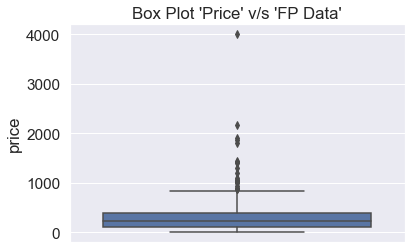

In [209]:
sns.boxplot(y="price",data=X_test_falsePos).set_title("Box Plot 'Price' v/s 'FP Data'")

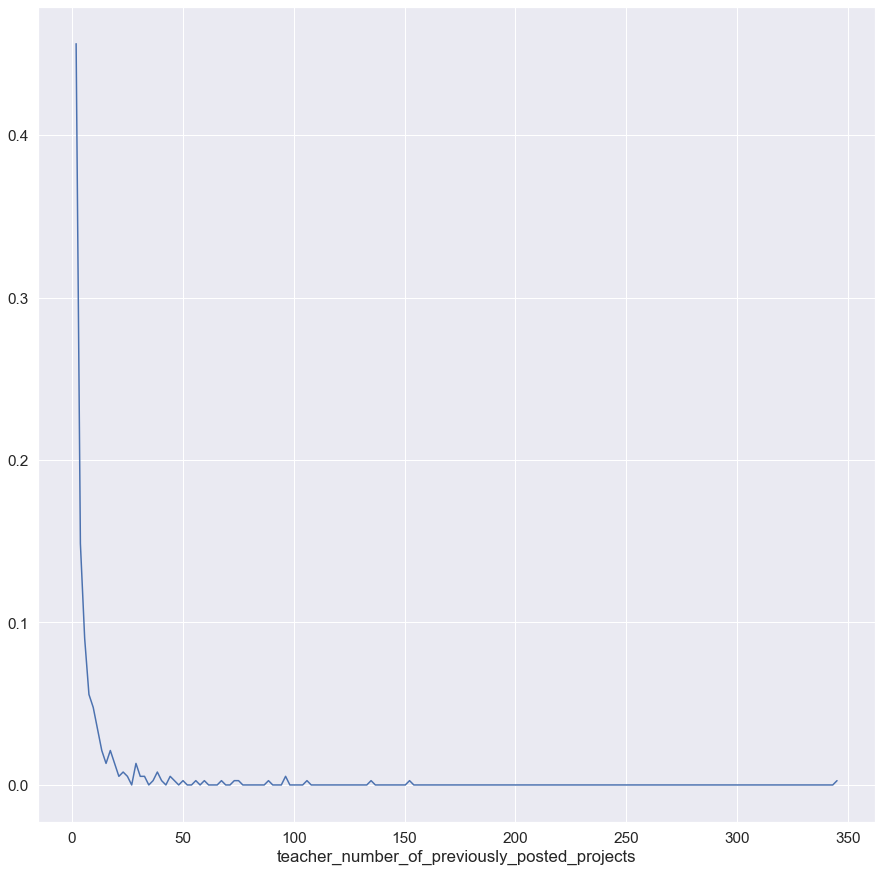

In [210]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(15,15))
counts, bin_edges = np.histogram(X_test_falsePos["teacher_number_of_previously_posted_projects"], bins="auto",density=True)
pdf = counts/sum(counts)
pdfPoints = plt.plot(bin_edges[1:],pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [211]:
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,
               X_train_subcategory_ohe,X_train_price_norm,X_train_quantity_norm,
               X_train_teach_prev_norm,X_train_title_count_norm,X_train_essay_count_norm,
               X_train_essay_pos_norm,X_train_essay_neg_norm,X_train_essay_neu_norm,
               X_train_essay_compound_norm,avg_w2v_vectors_train,avg_w2v_vectors_titles_train)).tocsr()

X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe,X_cv_price_norm,X_cv_quantity_norm,X_cv_teach_prev_norm,
               X_cv_title_count_norm,X_cv_essay_count_norm,X_cv_essay_pos_norm,X_cv_essay_neg_norm,
               X_cv_essay_neu_norm,X_cv_essay_compound_norm,avg_w2v_vectors_cv,avg_w2v_vectors_titles_cv)).tocsr()

X_te = hstack((X_test_state_ohe, X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,
               X_test_subcategory_ohe,X_test_price_norm,X_test_quantity_norm,
               X_test_teach_prev_norm,X_test_title_count_norm,X_test_essay_count_norm,
               X_test_essay_pos_norm,X_test_essay_neg_norm,X_test_essay_neu_norm,
               X_test_essay_compound_norm,avg_w2v_vectors_test,avg_w2v_vectors_titles_test)).tocsr()

In [212]:
print("Final Data matrix - for set 3")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 3
(31423, 708) (31423,)
(15477, 708) (15477,)
(23100, 708) (23100,)


In [213]:
tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
                  'min_samples_split': [5, 10, 100, 500]}

dt_output = DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(dt_output, tree_parameters, cv=10, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500

In [214]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6149216390452719
Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 500}
Train AUC scores
[0.54684302 0.54684302 0.54684302 0.54684302 0.66807236 0.66805155
 0.66718323 0.66498809 0.85153223 0.84922716 0.80857931 0.74157445
 0.99950871 0.99866073 0.92547263 0.76359444 0.99997946 0.99954966
 0.92935271 0.76336345 0.99998124 0.9995773  0.9295235  0.76354168
 0.99997673 0.99955755 0.92949637 0.76359904]
CV AUC scores
[0.54431922 0.54431922 0.54431922 0.54431922 0.6140568  0.61416892
 0.61405791 0.61492164 0.58362931 0.58449568 0.58865515 0.60772822
 0.52423978 0.52917846 0.55489354 0.60119584 0.52606939 0.52578273
 0.54997194 0.6013897  0.52772654 0.52864586 0.54940996 0.60145972
 0.52193967 0.52804779 0.54733993 0.60081551]


In [215]:
x1 = []
y1 = []
max_depth = [1, 5, 10, 50, 100, 500, 100]
min_samples_split = [5, 10, 100, 500]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
y1 = [y for item in min_samples_split for y in repeat(item, 7)]

In [216]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_scores, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=cv_auc_scores, name="cv auc")
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [217]:
dt_output = DecisionTreeClassifier(class_weight='balanced', max_depth = clf.best_params_["max_depth"], 
                                   min_samples_split = clf.best_params_["min_samples_split"])
dt_output.fit(X_tr, y_train)

y_train_pred = dt_output.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = dt_output.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

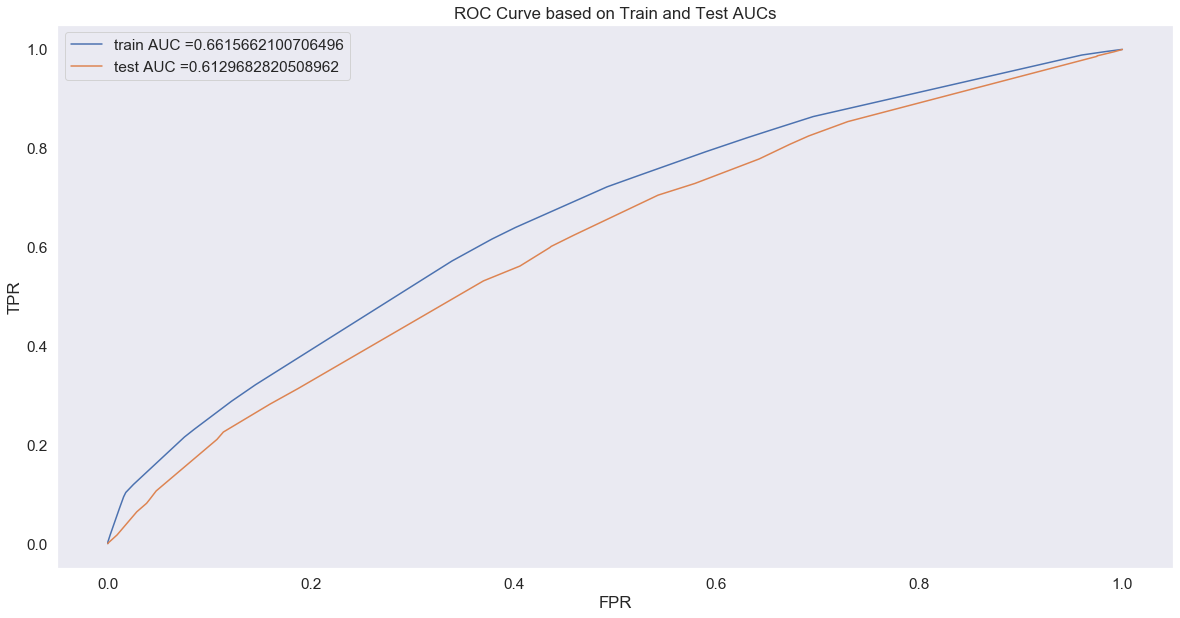

In [218]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [219]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.38291089110288906 for threshold 0.525
Train confusion matrix
[[ 2943  1796]
 [10231 16453]]
Test confusion matrix
[[ 1972  1531]
 [ 7811 11786]]


Text(0.5, 1, 'Training Confusion Matrix')

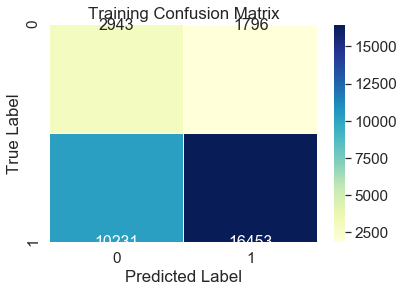

In [220]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

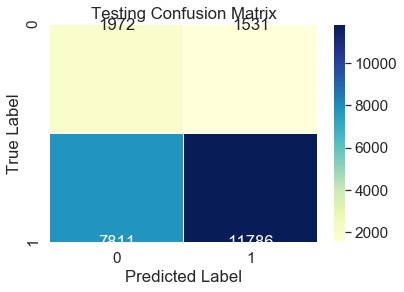

In [221]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [224]:
# Plot the box plot with the `price` of these `false positive data points`
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)
for i in false_pos_indices:
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i],axis=0))
    
X_test_falsePos.head(1)

id                        teacher_id teacher_prefix school_state  \
173  p189599  4b28bc08967e0b687de639a557fff4d5        Teacher           GA   

                   Date project_grade_category project_title  \
173 2016-04-28 07:22:55          Grades_PreK_2  kindles kids   

                              project_resource_summary  \
173  My students need Kindles for learning! Our kin...   

    teacher_number_of_previously_posted_projects  \
173                                            0   

                   clean_categories   clean_subcategories  \
173  Literacy_Language Math_Science  Literacy Mathematics   

                                                 essay title_word_count  \
173  what learn pleasure never forget alfred mercie...                2   

    essay_word_cnt    neg    pos    neu  compound  price quantity  
173            208  0.028  0.383  0.588    0.9982  53.06        3

Text(0.5, 1.0, "Box Plot 'Price' v/s 'FP Data'")

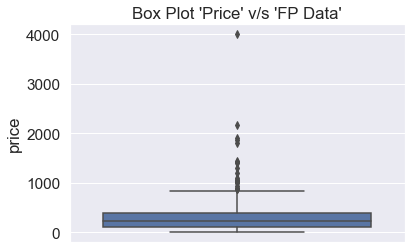

In [225]:
sns.boxplot(y="price",data=X_test_falsePos).set_title("Box Plot 'Price' v/s 'FP Data'")

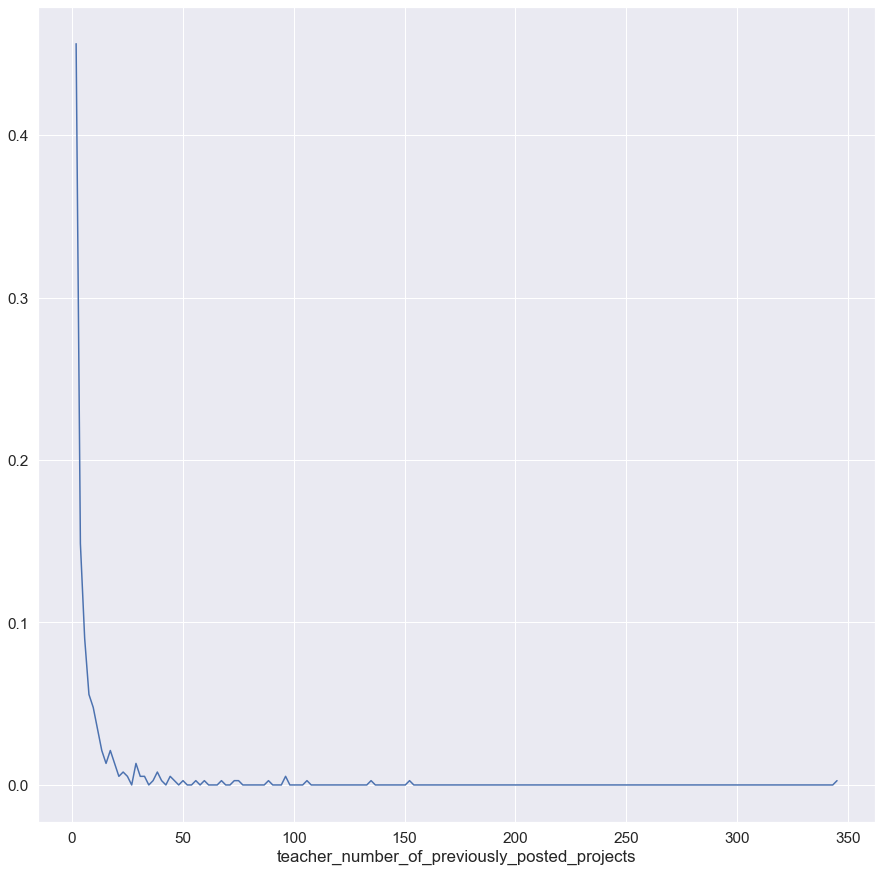

In [226]:
plt.figure(figsize=(15,15))
counts, bin_edges = np.histogram(X_test_falsePos["teacher_number_of_previously_posted_projects"], bins="auto",density=True)
pdf = counts/sum(counts)
pdfPoints = plt.plot(bin_edges[1:],pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [227]:
from scipy.sparse import hstack
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,
               X_train_subcategory_ohe,X_train_price_norm,X_train_quantity_norm,
               X_train_teach_prev_norm,X_train_title_count_norm,X_train_essay_count_norm,
               X_train_essay_pos_norm,X_train_essay_neg_norm,X_train_essay_neu_norm,
               X_train_essay_compound_norm,tfidf_w2v_vectors_train,tfidf_w2v_vectors_titles_train)).tocsr()

X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe,X_cv_price_norm,X_cv_quantity_norm,X_cv_teach_prev_norm,
               X_cv_title_count_norm,X_cv_essay_count_norm,X_cv_essay_pos_norm,X_cv_essay_neg_norm,
               X_cv_essay_neu_norm,X_cv_essay_compound_norm,tfidf_w2v_vectors_cv,tfidf_w2v_vectors_titles_cv)).tocsr()

X_te = hstack((X_test_state_ohe, X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,
               X_test_subcategory_ohe,X_test_price_norm,X_test_quantity_norm,
               X_test_teach_prev_norm,X_test_title_count_norm,X_test_essay_count_norm,
               X_test_essay_pos_norm,X_test_essay_neg_norm,X_test_essay_neu_norm,
               X_test_essay_compound_norm,tfidf_w2v_vectors_test,tfidf_w2v_vectors_titles_test)).tocsr()

In [228]:
print("Final Data matrix - for set 2")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 2
(31423, 708) (31423,)
(15477, 708) (15477,)
(23100, 708) (23100,)


In [229]:
tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
                  'min_samples_split': [5, 10, 100, 500]}

dt_output = DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(dt_output, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500]

In [230]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6198436812822727
Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 500}
Train AUC scores
[0.54657747 0.54657747 0.54657747 0.54657747 0.6717477  0.6717477
 0.67054761 0.66813907 0.86018244 0.85752611 0.81422682 0.74345164
 0.99960965 0.9990726  0.92232447 0.76061782 0.99997599 0.99955557
 0.92392819 0.76061782 0.99997699 0.99954767 0.9242953  0.76064756
 0.99997899 0.99955605 0.92427597 0.76064756]
CV AUC scores
[0.54570906 0.54570906 0.54570906 0.54570906 0.61932431 0.61928692
 0.61931058 0.61984368 0.58109595 0.5793422  0.58857293 0.6046711
 0.53188495 0.53622666 0.56212192 0.5987612  0.53038508 0.53263922
 0.56148387 0.59877917 0.53018541 0.53409715 0.56011268 0.59835093
 0.53141416 0.53364251 0.55830378 0.59833297]


In [231]:
x1 = []
y1 = []
max_depth = [1, 5, 10, 50, 100, 500, 100]
min_samples_split = [5, 10, 100, 500]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
y1 = [y for item in min_samples_split for y in repeat(item, 7)]

In [232]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_scores, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=cv_auc_scores, name="cv auc")
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [233]:
dt_output = DecisionTreeClassifier(class_weight='balanced', max_depth = clf.best_params_["max_depth"], 
                                   min_samples_split = clf.best_params_["min_samples_split"])
dt_output.fit(X_tr, y_train)

y_train_pred = dt_output.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = dt_output.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

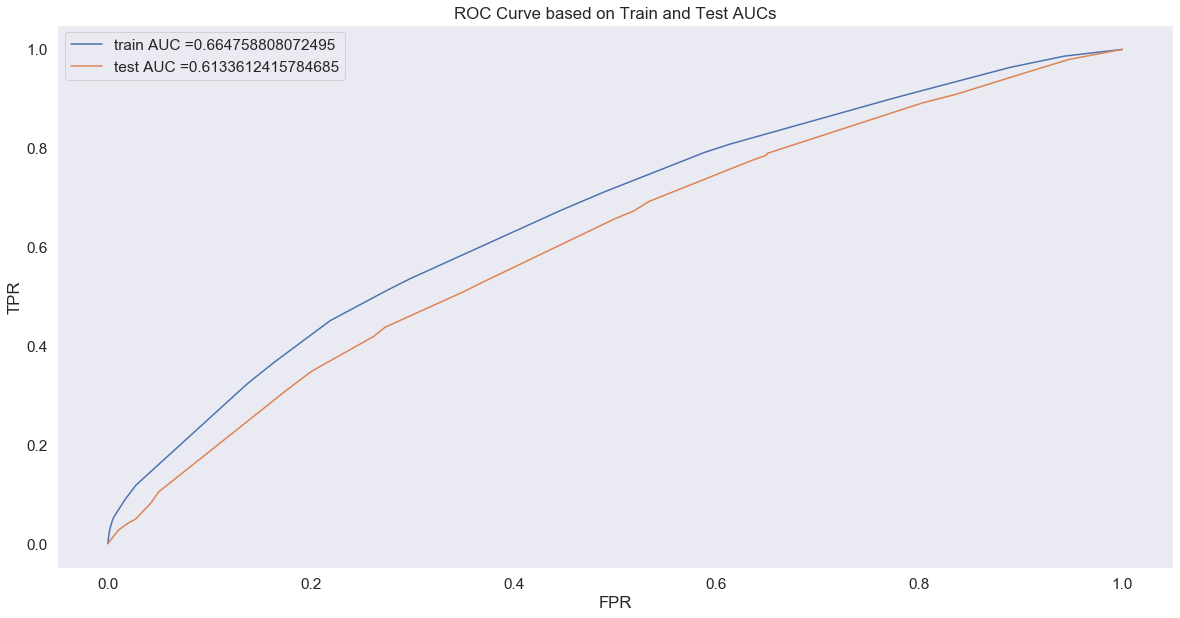

In [234]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [235]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.3763254032589305 for threshold 0.507
Train confusion matrix
[[ 3326  1413]
 [12376 14308]]
Test confusion matrix
[[ 2221  1282]
 [ 9301 10296]]


Text(0.5, 1, 'Training Confusion Matrix')

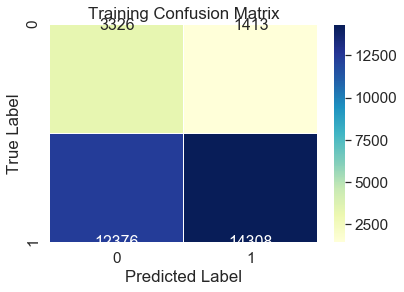

In [236]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

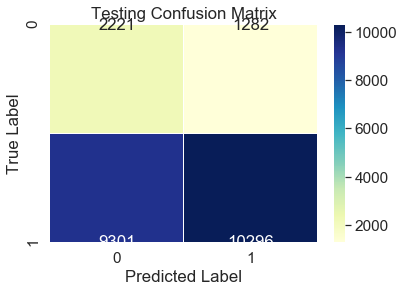

In [237]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [238]:
false_pos_indices = []
for i in range(len(y_test)):
    if(y_test[i]==0 and _predictions[i] == 1):
        false_pos_indices.append(i)
false_pos_essay = []
for i in false_pos_indices :
  false_pos_essay.append(X_test['essay'].values[i])

In [239]:
comments = " "
stopwords = set(STOPWORDS)
for _essay in false_pos_essay:
    tokens = str(_essay).lower().split()

for words in tokens:
    comments += words + " "
    
wordcloud = WordCloud(width=1000, height=1000, background_color="white",stopwords=stopwords, min_font_size=12).generate(comments)
    

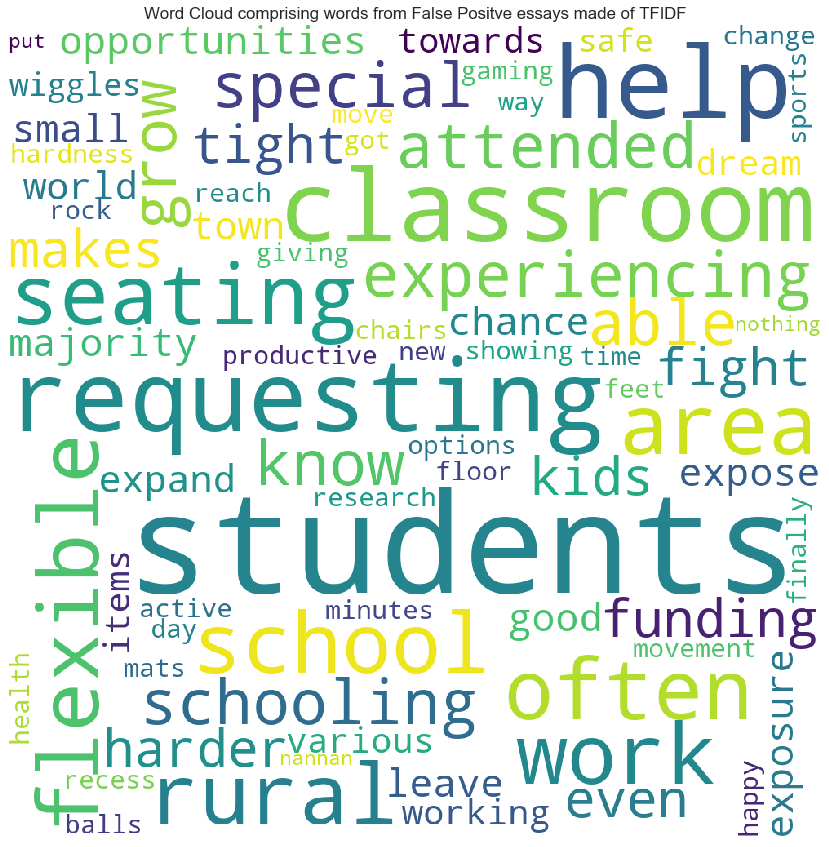

In [240]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud comprising words from False Positve essays made of TFIDF")
plt.show()

In [241]:
# Plot the box plot with the `price` of these `false positive data points`
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)
for i in false_pos_indices:
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i],axis=0))
    
X_test_falsePos.head(1)

id                        teacher_id teacher_prefix school_state  \
70  p136771  f0a5a67855edd4ed63aa8ca80b8f2f9c             Ms           IL   

                  Date project_grade_category               project_title  \
70 2016-04-27 13:46:05          Grades_PreK_2  technology in palm my hand   

                             project_resource_summary  \
70  My students need 1 iPad pro with 1 protective ...   

   teacher_number_of_previously_posted_projects   clean_categories  \
70                                          113  Literacy_Language   

   clean_subcategories                                              essay  \
70        ESL Literacy  a typical day classroom day full learning acti...   

   title_word_count essay_word_cnt    neg    pos    neu  compound   price  \
70                5            262  0.034  0.317  0.649    0.9981  969.98   

   quantity  
70        2

Text(0.5, 1.0, "Box Plot 'Price' v/s 'FP Data'")

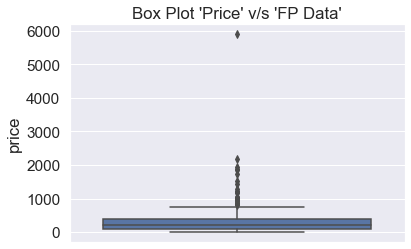

In [242]:
sns.boxplot(y="price",data=X_test_falsePos).set_title("Box Plot 'Price' v/s 'FP Data'")

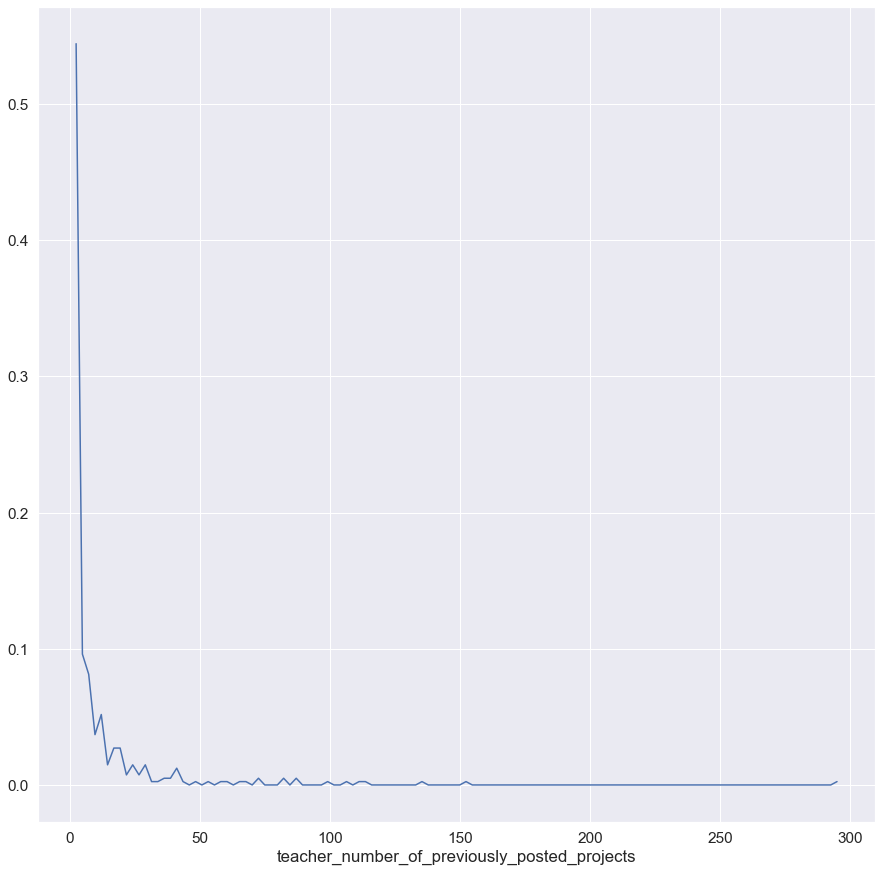

In [243]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(15,15))
counts, bin_edges = np.histogram(X_test_falsePos["teacher_number_of_previously_posted_projects"], bins="auto",density=True)
pdf = counts/sum(counts)
pdfPoints = plt.plot(bin_edges[1:],pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [244]:
# Train, CV and Test Datasets for TFIDF
X_tr = hstack((X_train_state_ohe, X_train_teacher_ohe,X_train_grade_ohe,X_train_category_ohe,
               X_train_subcategory_ohe,X_train_price_norm,X_train_quantity_norm,
               X_train_teach_prev_norm,X_train_title_count_norm,X_train_essay_count_norm,
               X_train_essay_pos_norm,X_train_essay_neg_norm,X_train_essay_neu_norm,
               X_train_essay_compound_norm,X_train_essay_tfidf,X_train_title_tfidf)).tocsr()

X_cr = hstack((X_cv_state_ohe, X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_category_ohe,
               X_cv_subcategory_ohe,X_cv_price_norm,X_cv_quantity_norm,X_cv_teach_prev_norm,
               X_cv_title_count_norm,X_cv_essay_count_norm,X_cv_essay_pos_norm,X_cv_essay_neg_norm,
               X_cv_essay_neu_norm,X_cv_essay_compound_norm,X_cv_essay_tfidf,X_cv_title_tfidf)).tocsr()

X_te = hstack((X_test_state_ohe, X_test_teacher_ohe,X_test_grade_ohe,X_test_category_ohe,
               X_test_subcategory_ohe,X_test_price_norm,X_test_quantity_norm,
               X_test_teach_prev_norm,X_test_title_count_norm,X_test_essay_count_norm,
               X_test_essay_pos_norm,X_test_essay_neg_norm,X_test_essay_neu_norm,
               X_test_essay_compound_norm,X_test_essay_tfidf,X_test_title_tfidf)).tocsr()

In [245]:
print("Final Data matrix - for set 2")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix - for set 2
(31423, 11855) (31423,)
(15477, 11855) (15477,)
(23100, 11855) (23100,)


In [248]:
# https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
def selectTopImportance(model, X, top=1):
    # model -> base classifier
    # X - Training Dataset
    # k - No of best features
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:top]]

In [247]:
tree_parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 100], \
                  'min_samples_split': [5, 10, 100, 500]}

dt_output = DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(dt_output, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100],
                         'min_samples_split': [5, 10, 100, 500]

In [249]:
X_final_train = selectTopImportance(clf,X_tr, top=5000)
X_final_test = selectTopImportance(clf, X_te, top=5000)

In [250]:
print(X_final_train.shape)
print(X_final_test.shape)

(31423, 5000)
(23100, 5000)


### Decision Trees on Important Features 

In [252]:
dtree = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}
clf = GridSearchCV(dtree, parameters, cv=5, scoring='roc_auc',return_train_score=True)
finalset= clf.fit(X_final_train, y_train)

In [253]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
test_auc = clf.cv_results_['mean_test_score'] 
test_auc_std = clf.cv_results_['std_test_score']

#Output of GridSearchCV
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)
print('='*75)
print('Train AUC scores')
print(clf.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf.cv_results_['mean_test_score'])

Best score:  0.6408302061728185
Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}
Train AUC scores
[0.54657747 0.54657747 0.54657747 0.54657747 0.65282218 0.65272015
 0.65140746 0.64830792 0.76438734 0.7619719  0.73557756 0.71232782
 0.98919603 0.98269881 0.91976358 0.82582026 0.99863399 0.99608425
 0.95013695 0.8322931  0.99993391 0.99857262 0.95496711 0.83270728
 0.99992923 0.99856949 0.95524399 0.83322411]
CV AUC scores
[0.54570906 0.54570906 0.54570906 0.54570906 0.62449708 0.62454337
 0.62458707 0.62626691 0.62328374 0.62398378 0.62782281 0.64083021
 0.55155385 0.55412469 0.57790746 0.61162182 0.53799901 0.54208392
 0.56201215 0.61067713 0.54074493 0.54407825 0.56208396 0.60862399
 0.53919925 0.53917708 0.55828592 0.60866646]


In [254]:
x1 = []
y1 = []
max_depth = [1, 5, 10, 50, 100, 500, 100]
min_samples_split = [5, 10, 100, 500]
train_auc_scores = clf.cv_results_['mean_train_score']
cv_auc_scores = clf.cv_results_['mean_test_score']

x1 = [x for item in max_depth for x in repeat(item, 4)]
y1 = [y for item in min_samples_split for y in repeat(item, 7)]

In [255]:
trace1 = go.Scatter3d(x=x1,y=y1,z=train_auc_scores, name="train auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=cv_auc_scores, name="cv auc")
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [256]:
dt_output = DecisionTreeClassifier(class_weight='balanced', max_depth = clf.best_params_["max_depth"], 
                                   min_samples_split = clf.best_params_["min_samples_split"])
dt_output.fit(X_tr, y_train)

y_train_pred = dt_output.predict_proba(X_tr)[:,1]  # returning probability estimates of positive class 
y_test_pred = dt_output.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

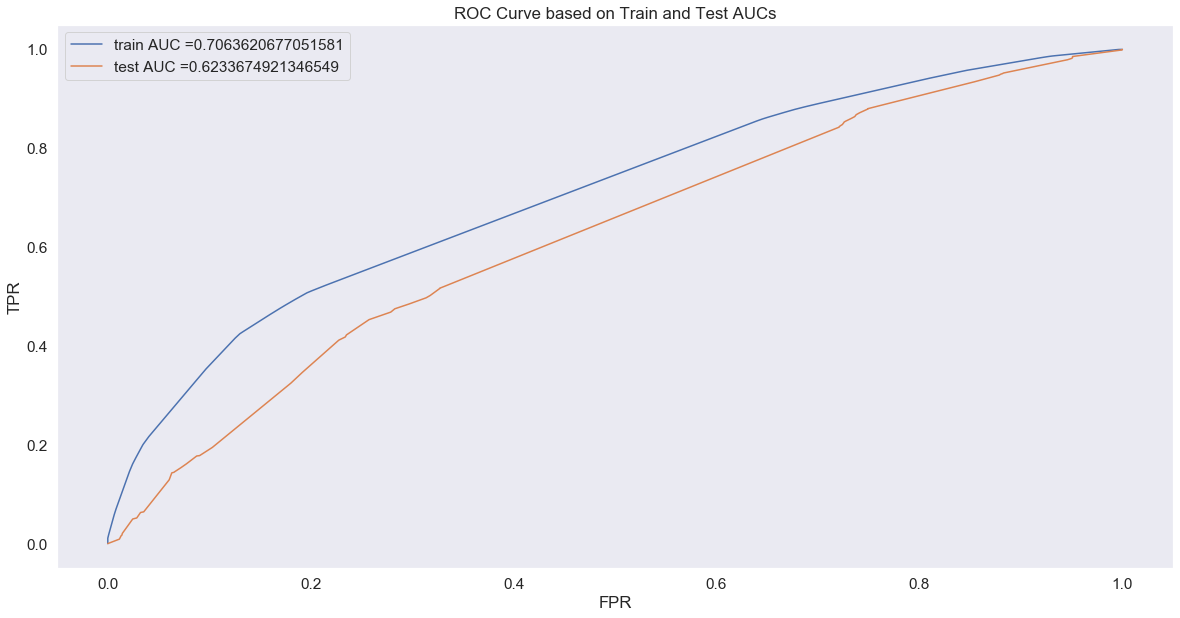

In [257]:
plt.figure(figsize=(20,10))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve based on Train and Test AUCs")
plt.grid()
plt.show()

In [258]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
Train_CM = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
Test_CM = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print("Train confusion matrix")
print(Train_CM)
print("Test confusion matrix")
print(Test_CM)

the maximum value of tpr*(1-fpr) 0.41081168363163656 for threshold 0.44
Train confusion matrix
[[ 3703  1036]
 [12655 14029]]
Test confusion matrix
[[ 2343  1160]
 [ 9407 10190]]


Text(0.5, 1, 'Training Confusion Matrix')

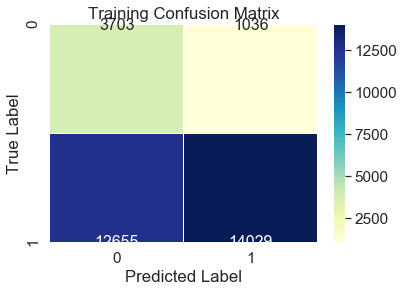

In [259]:
sns.set(font_scale=1.4)
sns.heatmap(Train_CM,annot=True,cbar=True,fmt="g", annot_kws = {"size":16},linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Training Confusion Matrix')

Text(0.5, 1, 'Testing Confusion Matrix')

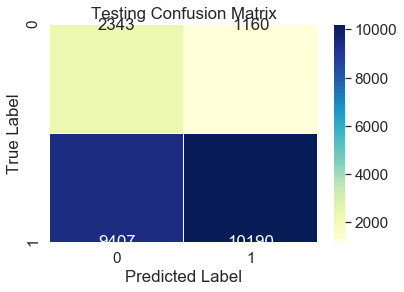

In [260]:
sns.heatmap(Test_CM,annot=True,cbar=True,fmt="d", linewidths=.5,cmap="YlGnBu")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Testing Confusion Matrix')

In [261]:
# Please write all the code with proper documentation
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr,y_train)
_dot_data = tree.export_graphviz(dtree, feature_names=feature_names_bow)
graph = Source(_dot_data)
graph.render("Best Features TFIDF Tree", view=True)

'Best Features TFIDF Tree.pdf'

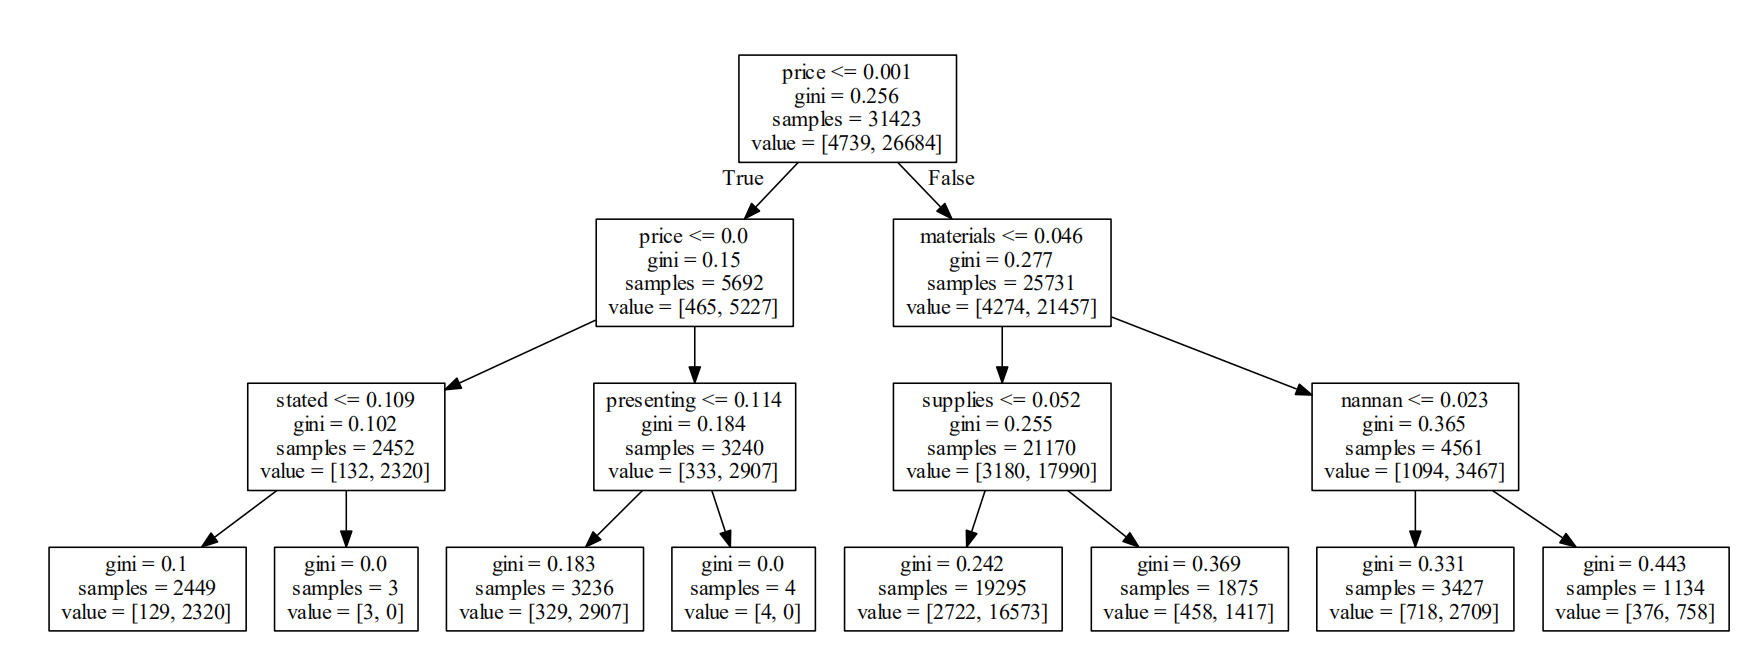

In [262]:
false_pos_indices = []
for i in range(len(y_test)):
    if(y_test[i]==0 and _predictions[i] == 1):
        false_pos_indices.append(i)
false_pos_essay = []
for i in false_pos_indices :
  false_pos_essay.append(X_test['essay'].values[i])

In [263]:
comments = " "
stopwords = set(STOPWORDS)
for _essay in false_pos_essay:
    tokens = str(_essay).lower().split()

for words in tokens:
    comments += words + " "
    
wordcloud = WordCloud(width=1000, height=1000, background_color="white",stopwords=stopwords, min_font_size=12).generate(comments)
    

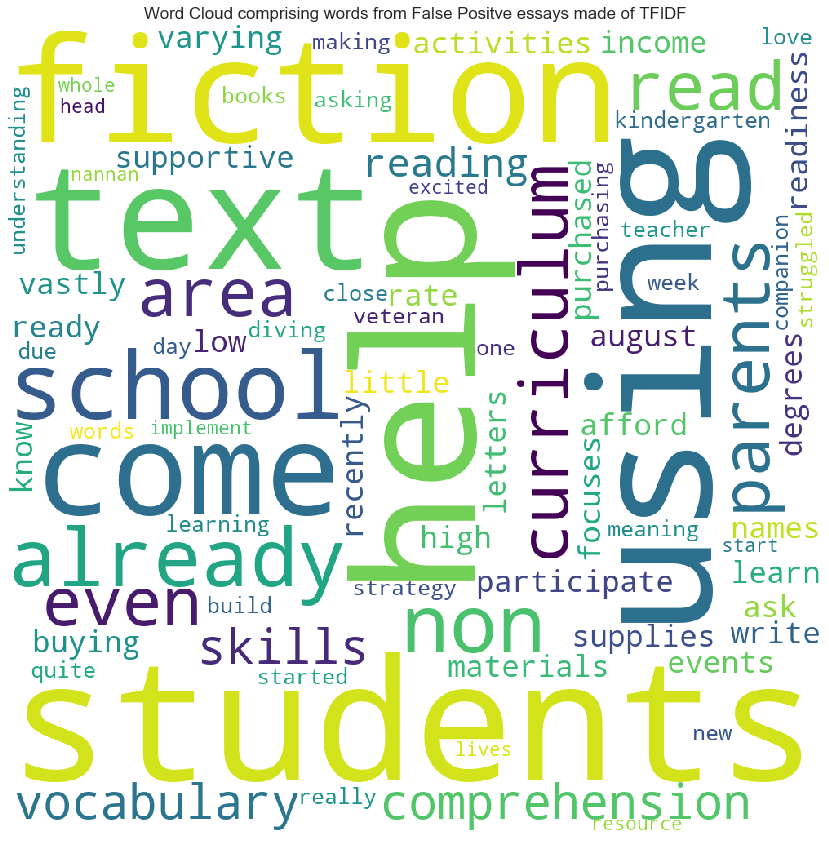

In [264]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud comprising words from False Positve essays made of TFIDF")
plt.show()

In [265]:
# Plot the box plot with the `price` of these `false positive data points`
cols = X_test.columns
X_test_falsePos = pd.DataFrame(columns=cols)
for i in false_pos_indices:
    X_test_falsePos = X_test_falsePos.append(X_test.filter(items=[i],axis=0))
    
X_test_falsePos.head(1)

id                        teacher_id teacher_prefix school_state  \
173  p189599  4b28bc08967e0b687de639a557fff4d5        Teacher           GA   

                   Date project_grade_category project_title  \
173 2016-04-28 07:22:55          Grades_PreK_2  kindles kids   

                              project_resource_summary  \
173  My students need Kindles for learning! Our kin...   

    teacher_number_of_previously_posted_projects  \
173                                            0   

                   clean_categories   clean_subcategories  \
173  Literacy_Language Math_Science  Literacy Mathematics   

                                                 essay title_word_count  \
173  what learn pleasure never forget alfred mercie...                2   

    essay_word_cnt    neg    pos    neu  compound  price quantity  
173            208  0.028  0.383  0.588    0.9982  53.06        3

Text(0.5, 1.0, "Box Plot 'Price' v/s 'FP Data'")

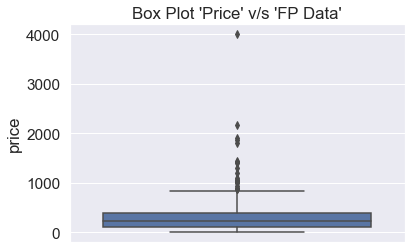

In [266]:
sns.boxplot(y="price",data=X_test_falsePos).set_title("Box Plot 'Price' v/s 'FP Data'")

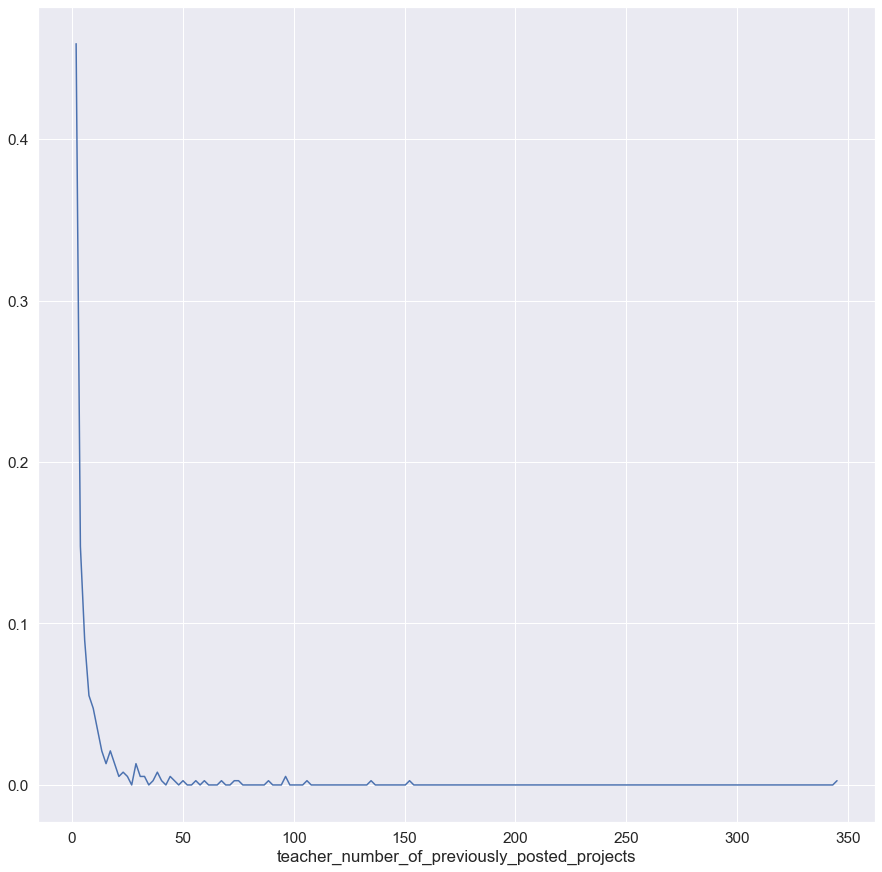

In [267]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
plt.figure(figsize=(15,15))
counts, bin_edges = np.histogram(X_test_falsePos["teacher_number_of_previously_posted_projects"], bins="auto",density=True)
pdf = counts/sum(counts)
pdfPoints = plt.plot(bin_edges[1:],pdf)
plt.xlabel("teacher_number_of_previously_posted_projects")
plt.show()

<h1>3. Conclusion</h1>

In [271]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameter-max depth", "min samples split", "Train AUC", "Test AUC"] 
x.add_row(["BOW","DT",10,500,0.69,0.639])
x.add_row(["TFIDF","DT",10,500,0.70,0.624])
x.add_row(["W2V","DT",5,500,0.681,0.612])
x.add_row(["TFIDF W2V","DT",5,500,0.664,0.613])
x.add_row(["Best 5k TFIDF", "DT", 10,500, 0.70, 0.62])
print(x)

+---------------+-------+--------------------------+-------------------+-----------+----------+
|   Vectorizer  | Model | Hyperparameter-max depth | min samples split | Train AUC | Test AUC |
+---------------+-------+--------------------------+-------------------+-----------+----------+
|      BOW      |   DT  |            10            |        500        |    0.69   |  0.639   |
|     TFIDF     |   DT  |            10            |        500        |    0.7    |  0.624   |
|      W2V      |   DT  |            5             |        500        |   0.681   |  0.612   |
|   TFIDF W2V   |   DT  |            5             |        500        |   0.664   |  0.613   |
| Best 5k TFIDF |   DT  |            10            |        500        |    0.7    |   0.62   |
+---------------+-------+--------------------------+-------------------+-----------+----------+
